# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
import os
import seaborn as sns
from scipy import stats

In [13]:
myfold = os.getcwd()
medical = pd.read_csv(myfold + '/insurance2.csv')

In [14]:
medical.shape

(1338, 8)

In [15]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

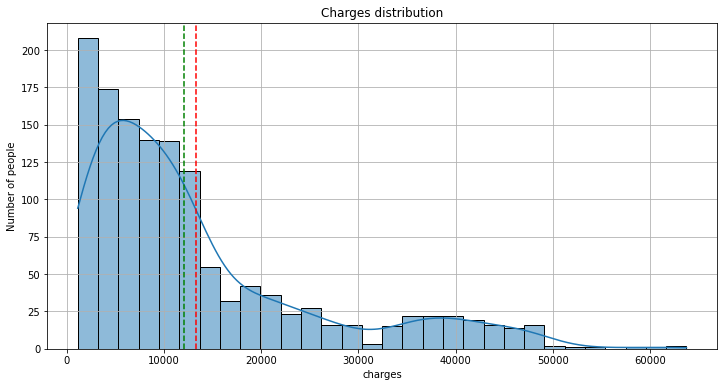

In [67]:
f, ax = plt.subplots(figsize = (12,6))
_ = sns.histplot(x=medical['charges'],kde=True)
_ = plt.xlabel('charges')
_ = plt.ylabel('Number of people')
_ = plt.title('Charges distribution')
_ = plt.axvline(np.mean(medical.charges),color='r',linestyle='--')
_ = plt.axvline(np.std(medical.charges),color='g',linestyle='--')
_ =plt.grid(True)
_ = plt.show()


In [36]:
charges_mean = np.mean(medical['charges'])
charges_std = np.std(medical['charges'])
print('Mean:', round(charges_mean,2),'&', 'Std:' ,round(charges_std,2))

Mean: 13270.42 & Std: 12105.48


* It is clear the measure of spread of charges (Standard deviation) is very large and the distribution is skewed to the right and is not a normal distribution.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ The observations we have are the result of random sampling, we can use t-statisic(as we do not know the population standard deviation)to test if the charges are falling below 12,000,thus threatening the hospital's operational model.We can calculate the confidence interval about the true but unknown mean (charge). If the confidence interval of the mean includes 12,000 then we can conclude that the administrator should be concerned.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ The appropriate confidence intervel in this case is one-sided to the left (lower) as the administrator is worried that the average charge is beolw 12000.

**Critical value is calculated as follows:**
 For 95% confidence interval for the mean using the t distribution:
 Subtract the confidence level from 100% to find the α level: 100% – 95% = 5%.
 Convert Step 1 to a decimal: 5% = 0.05.
 Divide Step 2 by 2 (this is called “α/2”).0.05/2 = 0.025,because we're only interested in the area for one tail.
 Subtract Step 3 from 1 (because we want the area in the middle, not the area in the tail): 1 – 0.025 = 0.975.
 Degree of freedom(df) = number of samples - 1 = len(charges)-1

**Standard error = Standard deviation/SQRT(n)**

**Margin of Error = Critical value * Standard Error**

In [69]:
critical_t = t.ppf(0.975,df= len((medical.charges)-1))
print('critial t value: ',round(critical_t,2))

critial t value:  1.96


In [73]:
standard_error = np.std(medical.charges)/ np.sqrt(len(medical.charges))
print('Standard Error: ',round(standard_error,2))

Standard Error:  330.94


In [76]:
margin_of_error = critical_t * standard_error
print('Margin of Error',round(margin_of_error,2))

Margin of Error 649.23


In [78]:
print('The lower bound for 95% confidence interval of the mean using the t distribution is', 
      round((charges_mean-margin_of_error),2))

The lower bound for 95% confidence interval of the mean using the t distribution is 12621.2


**The administrator need not be worried as the true mean is more than 12000.**

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

**Null hypothesis(H0)** People with or without insurance are not charged different.

**Alternate hypothesis(H1)** People with and without insurance are charged different.

**The assumption here is that the population variances are equal.**

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [95]:
medical.groupby('insuranceclaim')['charges'].describe()


,count,mean,std,min,25%,50%,75%,max
insuranceclaim,,,,,,,,
0,555.0,8821.421892,6446.510127,1121.8739,4445.337575,6933.24225,11424.211575,36910.60803
1,783.0,16423.928277,14045.928419,1131.5066,5733.288925,11538.42100,23484.788875,63770.42801


In [110]:
#create two data frames
df0, df1 = [x for _, x in medical.groupby(medical['insuranceclaim'] > 0)]

In [119]:
n0 = len(df0)
n1 = len(df1)

In [127]:
x0 = np.mean(df0['charges'])
x1 = np.mean(df1['charges'])

In [122]:
s0 = np.std(df0['charges'],ddof=1)
s1 = np.std(df1['charges'],ddof=1)

In [120]:
df = n0+n1-2
print(df)

1336


In [126]:
#Let's calculate the pooled standard deviation of the two groups:
std_p_manual = np.sqrt(((n0-1)*s0**2 + (n1-1)*s1**2)/df)
print('The pooled standard deviation of the two groups:',std_p_manual)

The pooled standard deviation of the two groups: 11520.034268775256


In [133]:
# Let's calulate t-test statistic:
t_test_manual = (x0-x1)/((np.sqrt(1/n0 + 1/n1))*std_p_manual)
print('t-test statistic manual:',t_test_manual)

t-test statistic manual: -11.89329903087671


In [137]:
critical_value = t.ppf(1-0.975,df)
print(critical_value)

-1.9617412190546957


* In this case the t-statistic(-11.89) is further away from zero than critical_t(-1.96) our result is statistically significant.Hence our null hypothesis(H0)- People with or without insurance are not charged different is rejected.

In [135]:
#Using the appropriate function scipy stats
stats.ttest_ind(df0.charges,df1.charges)

Ttest_indResult(statistic=-11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__In order to perform z-test both samples need to be normally distributed??

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test